In [7]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

del_e2 = []
energy =[]
latticesize = []
T = 1.8                          #temp in units if j and kb

for l in range(2,21):
    neqil = 2000
    nitter = 4000                  #monte carlo steps
    j_ising = 1                     #j in hamiltonian of ising model
    E = 0                    
    spin = np.ones((l, l))          #2d lattice

    #randomize the lattice

    for i in range(l):
        for j in range(l):
            if rnd.uniform(0,1) < 0.5:
                spin[i][j] = -1
            
    #claculating initial energy and magnetizaton of lattice
    for i in range(l):
            for j in range(l):
                
                a, b, c, d = i + 1, i - 1, j + 1, j - 1                     #identifying neighbours
                if (i == l - 1): a = 0                                      #-----------------------
                if (i == 0): b = l - 1                                      #periodic boundry condition
                if (j == l - 1): c = 0
                if (j == 0): d = l - 1                                      #-----------------------
                
                
                E = E - j_ising*(spin[i][j] * (spin[a][j] + spin[b][j] + spin[i][c] + spin[i][d]))


    E = E/2                                                 #energy (divided by two because counted spin pairs twice)
                                         


    #evolving the sytem to equilibrium   
    
    avg_e =  0
    avg_e_n =0
    avg_e_2= 0        
    #evolving the sytem to equilibrium 
    for  time in range(nitter):
        for itter1 in range(l):
            for itter2 in range(l):
                i = int(rnd.uniform(0,1)*l) 
                j = int(rnd.uniform(0,1)*l)
                    
                a, b, c, d = i + 1, i - 1, j + 1, j - 1                     #identifying neighbours
                if (i == l - 1): a = 0                                      #-----------------------
                if (i == 0): b = l - 1                                      #periodic boundry condition
                if (j == l - 1): c = 0
                if (j == 0): d = l - 1                                      #-----------------------
                    
                    #energy before flip
                Ei = (-j_ising)*(spin[i][j] * (spin[a][j] + spin[b][j] + spin[i][c] + spin[i][d]))
                
                spin[i][j] = -spin[i][j]                                    #trial flip
                    
                    #energy after flip
                Ef = (-j_ising)*(spin[i][j] * (spin[a][j] + spin[b][j] + spin[i][c] + spin[i][d]))

                    #Metropolis Algorithm
                    #-----------------------------------
                if(Ef - Ei <= 0):
                    E += (Ef - Ei)
                        
                else:
                    h = rnd.uniform(0,1)
                    if(h < np.exp(-(Ef - Ei)/T)):
                        E += (Ef - Ei)
                            
                    else:
                        spin[i][j] = -spin[i][j]
                    #-------------------------------------
        if(time >= neqil):
                   
            avg_e += abs(E/l**2)
                    
            avg_e_2 += abs(E**2)
                    
            avg_e_n += abs(E)
                
    avg_e_2 = avg_e_2/(nitter - neqil)
    #avg_e = avg_e/(nitter - neqil)
    avg_e_n = avg_e_n/(nitter - neqil)
    
    
    del_e=(avg_e_2 - avg_e_n**2)
    energy.append(avg_e_n)
    del_e2.append(del_e)
    latticesize.append(l*l)


energy1 = np.array(energy)
del_e2_1 = np.array(del_e2)
# plt.scatter(latticesize, (np.sqrt(del_e2_1))/energy1)   


# plt.show()

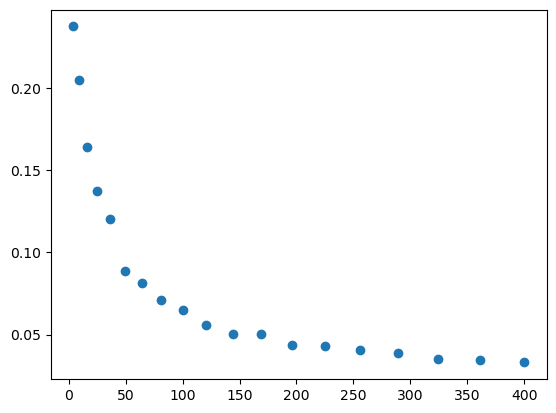

In [8]:
plt.scatter(latticesize, (np.sqrt(del_e2_1))/energy1)   


plt.show()

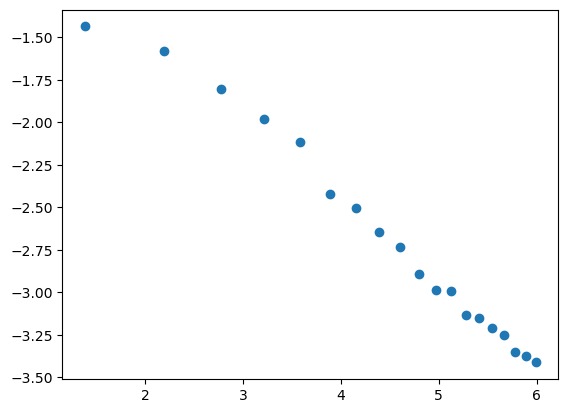

In [9]:
plt.scatter(np.log(latticesize), np.log((np.sqrt(del_e2_1))/energy1))   


plt.show()

In [10]:
X = np.log(latticesize)
Y = np.log((np.sqrt(del_e2_1))/energy1)
print(X,Y)

[1.38629436 2.19722458 2.77258872 3.21887582 3.58351894 3.8918203
 4.15888308 4.39444915 4.60517019 4.79579055 4.9698133  5.12989871
 5.27811466 5.4161004  5.54517744 5.66642669 5.78074352 5.88887796
 5.99146455] [-1.43654466 -1.58270691 -1.80655897 -1.98301066 -2.11628418 -2.42244875
 -2.50469823 -2.64313611 -2.73354497 -2.89001532 -2.98627567 -2.99249069
 -3.13153435 -3.14864245 -3.21158612 -3.25024447 -3.34901359 -3.37404296
 -3.41223087]


In [11]:
from statistics import mean
slope= ( (mean(X)*mean(Y)) - mean(X*Y)  )/( mean(X)**2 -  mean(X**2) )
print(slope)

-0.4743562312879492


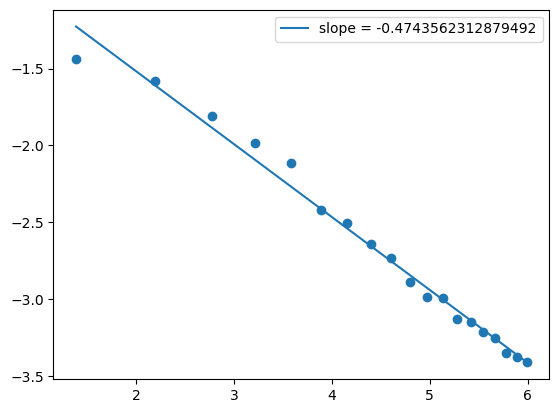

In [12]:
b = mean(Y)-slope*mean(X) #intercept
reg_line = [(slope*x)+b for x in X]
plt.plot(X,reg_line, label= f"slope = {slope}")
plt.scatter(X,Y)
plt.legend()
plt.show()